## Zadanie: 

1. połączyć się z dowolnym zbiorem danych, czy to offline excel file, czy online data przez API, przetworzyć te dane 
2. wyświetlić wizualizację np. średniej / mediany zarobków w zależności od obszaru zamieszkania / płci / poziomu wykształcenia 
   wystarczy jedno z tych (albo własna inwencja twórcza - od koloru do wyboru). 
   
3. Podstawy statystyki i zrozumienie w praktyce pojęć takich jak średnia, mediana, wariancja.
Odpowiedź na zapytania z działu sprzedaży o pomocne statystyki oraz zaproponowanie tych statystyk wraz z ich opisem i zrozumieniem abstrakcyjnych pojęć w locie (nie samo podstawienie do wzoru np. odchylenia standardowego jest najistotniejsze). 

Ważne, żeby pokazać jakieś np. SQL query, przetwarzanie dataframe i proste operacje na dataframe oraz wizualzację. Należy użyć SQL, pandas i np. matplotlib albo PySpark z Azure (preferowane).

In [0]:
sc

Out[2]:

SparkContext 

 Spark UI 

 
 Version 
 v3.1.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
path_adult = "/databricks-datasets/adult/adult.data"

field_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "label"
]

df_adult = spark.read.csv(path_adult)
df_adult = df_adult.toDF(*field_names)
df_adult.registerTempTable("adult")

In [0]:
df_adult.count() == df_adult.na.drop().count()
# spawdzamy czy występują wartości null

Out[6]: True

In [0]:
df_adult.count() == df_adult.drop_duplicates().count()
# sprawdzamy duplikaty

Out[7]: False

In [0]:
df_adult = df_adult.drop_duplicates()
# usuwamy duplikaty 


In [0]:
# usuwamy spacje w kolumnach 
from pyspark.sql import functions as f

for colname in df_adult.columns:
    df_adult = df_adult.withColumn(colname, f.trim(f.col(colname)))

Wyświetlić wizualizację np. średniej / mediany zarobków w zależności od obszaru zamieszkania / płci / poziomu wykształcenia 
wystarczy jedno z tych (albo własna inwencja twórcza - od koloru do wyboru). 
ad . 

Zaprezentować dane statystyczne 

Ważne, żeby pokazać jakieś: np. SQL query, przetwarzanie dataframe i proste operacje na dataframe oraz wizualzację. 
Należy użyć:
  
  SQL,   pandas i np. matplotlib   albo PySpark z Azure (preferowane).

# 1. Pandas way

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df_pandas = df_adult.toPandas()
df_pandas.head(3)

Out[11]:

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,44,Local-gov,181344,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,38,United-States,>50K
1,20,?,137300,HS-grad,9,Never-married,?,Other-relative,White,Female,0,0,35,United-States,<=50K
2,26,Private,90980,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,55,United-States,<=50K


In [0]:
df_pandas.agg(['mean', 'median'])

Out[23]:

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
mean,inf,inf,inf,inf,inf,inf
median,37.0,178356.0,10.0,0.0,0.0,40.0


zbiór danych jest duży, pandas pokazuje inf jako srednią dla kolumn numerycznych, wyjsciem jest tablica numpy i wstawienie jej w df

In [0]:
np.asarray(df_pandas.age, dtype=np.float).mean()

Out[12]: 38.585548759873376

Dane statystyczne w Pandas: 
.describe(): pokaże, ilość wierzy, średnią, min, max, odchylenie standardowe
.mean(), .std()
.median()
.mode() bądź .value_counts() pokaże modę na podium

In [0]:
df_pandas.age.describe()

Out[15]: count 32537.000000
mean 38.585549
std 13.637984
min 17.000000
25% 28.000000
50% 37.000000
75% 48.000000
max 90.000000
Name: age, dtype: float64

In [0]:
df_pandas['age'] = pd.DataFrame(np.asarray(df_pandas.age, dtype=np.float))
df_pandas.age.agg(['mean', 'median', 'std'])

Out[16]: mean 38.585549
median 37.000000
std 13.637984
Name: age, dtype: float64

In [0]:
df_pandas.age.mode()

Out[17]: 0 36.0
dtype: float64

W odniesieniu do zawartości zbioru adult, który pokazuje zarobki w kolumnie label jako powyżej 50 i ponizej 50 k, 
bedzie to średnia, mediana wieku w odniesieniu do poziomu zarobków

1. Zobaczmy jak kształtuje się rozłożenie wieku i zarobków w zbiorze adult

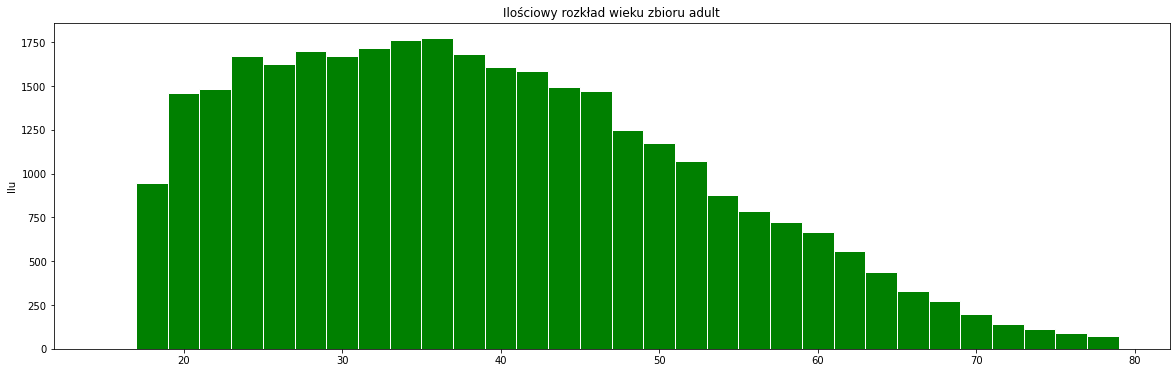

In [0]:
wiek = df_pandas.sort_values(by='age',ascending=True)  
plt.figure(figsize=(20,6))
plt.title ('Ilościowy rozkład wieku zbioru adult')
plt.ylabel('Ilu')
plt.hist(wiek.age, bins = np.arange(15,80,2), color='green', edgecolor = 'white');


w zbiorze adult ilościowo dominują 30-latkowie

Out[33]:

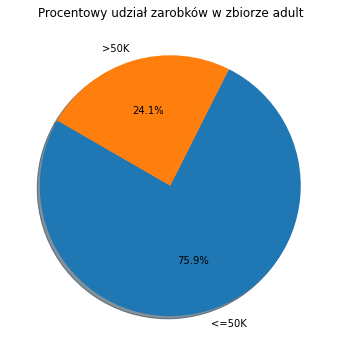

([<matplotlib.patches.Wedge at 0x7f8098158190>,
 <matplotlib.patches.Wedge at 0x7f8098158880>],
 [Text(0.3148710844914664, -1.053971631568501, '<=50K'),
 Text(-0.3148710351514925, 1.0539716463086792, '>50K')],
 [Text(0.17174786426807256, -0.5748936172191823, '75.9%'),
 Text(-0.17174783735535953, 0.5748936252592796, '24.1%')])

In [0]:
zarobki = df_pandas['label'].value_counts()
plt.figure(figsize=(12,6))
plt.title ('Procentowy udział zarobków w zbiorze adult')
plt.pie(zarobki,labels= zarobki.index, autopct='%1.1f%%',startangle=150,shadow=True)

ok 24 % w zbiorze adult zarabia powyżej 50 k $, dominująca część ok 76 % zarabia ponieżej 50 k

Pandas 2. Średnia, Mediana i odchylenie wieku w odniesieniu do poziomu zarobków

Out[58]:

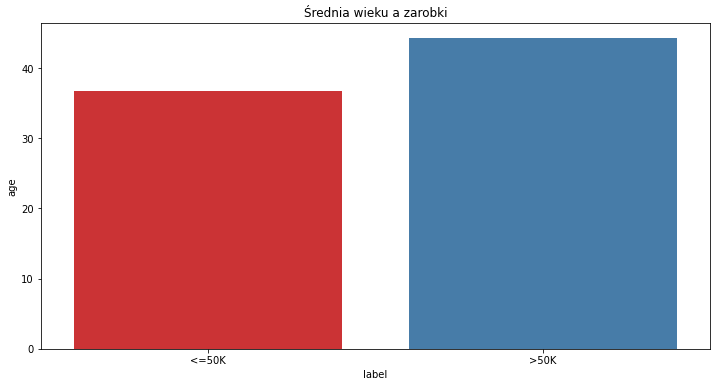

<matplotlib.axes._subplots.AxesSubplot at 0x7f13f0be5ac0>

In [0]:
mean = df_pandas.groupby('label')['age'].mean()
plt.figure(figsize=(12,6))
plt.title ('Średnia wieku a zarobki')
sns.barplot(x=mean.index, y= mean, palette='Set1')

In [0]:
mean

Out[59]: label
<=50K 36.787392
>50K 44.250925
Name: age, dtype: float64

Średnia wieku w grupie osób zarabiający powyżej 50 k wynosiła 44 lata, dla osób zarabiających poniżej 50 % 36 lat

Out[23]:

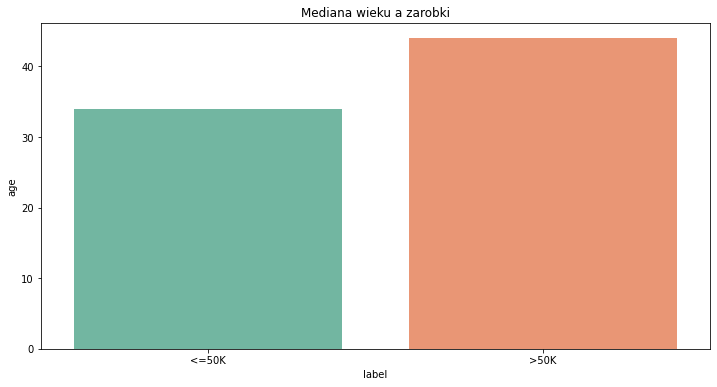

<matplotlib.axes._subplots.AxesSubplot at 0x7f809b193910>

In [0]:
median = df_pandas.groupby('label')['age'].median()
plt.figure(figsize=(12,6))
plt.title ('Mediana wieku a zarobki')
sns.barplot(x=median.index, y= median, palette='Set2')

In [0]:
median


Out[24]: label
<=50K 34.0
>50K 44.0
Name: age, dtype: float64

Mediana wieku w grupie osób zarabiający powyżej 50 k wynosiła 44 lata, dla osób zarabiających poniżej 50 % 34 lat

Mediana pokryła się ze średnia dla zbioru osób zarabiających powyżej 50 k, oraz choć nieznacznie jednak różniła się w przypadku osób zarabiających poniżej 50 k. Zbiór osób zarabiających więcej był zbiorem mniejszym, zbiór osób zarabijących mniej liczył więcej wartości skrajnych na które średnia jest podatna

Out[36]:

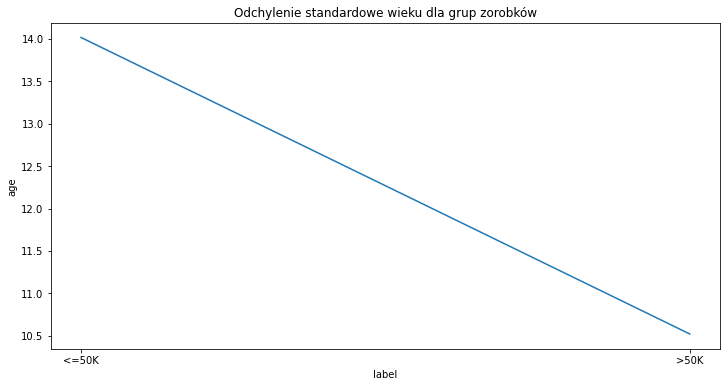

<matplotlib.axes._subplots.AxesSubplot at 0x7f80980e5760>

In [0]:
odchylenie = df_pandas.groupby('label')['age'].std()
plt.figure(figsize=(12,6))
plt.title ('Odchylenie standardowe wieku dla grup zorobków')
sns.lineplot(x=odchylenie.index, y= odchylenie, palette='Set1')

In [0]:
odchylenie

Out[37]: label
<=50K 14.017335
>50K 10.520102
Name: age, dtype: float64

odchylenie standardowe wieku dla grupy zarobków wyższych wyniosło ok 10, dla grupy zarobków poniżej 50 k wyniosło ok. 14. Grupa osób zarabiających powyżej 50 k, cechuje się niższym odchylenie 10 lat od średniej, co znaczy, że średnia wieku osób zarabiających powyżej 50 k wyniosła 44 lata, ale z uwagi na rozproszenie wartości, zarobki te spotykano w zakresie + - 10 lat czyli w grupie 34 - 54 lata.

## SQL way

1. średnia wieku dla danej klasy pracowniczej

In [0]:
%sql
SELECT count(*), round(avg(age), 0) AS avg_age, workclass FROM adult
WHERE workclass != ' ?' GROUP BY workclass
ORDER BY avg_age ASC;   

count(1),avg_age,workclass
7,21.0,Never-worked
22696,37.0,Private
1298,39.0,State-gov
2093,42.0,Local-gov
960,43.0,Federal-gov
2541,45.0,Self-emp-not-inc
1116,46.0,Self-emp-inc
14,48.0,Without-pay


i
idać drogą przez sql query, doszedłem, do trudności:

1. wyświetlenia mediana, która nie jest naturalną funkcją sql-a, 

2. doszło również do mnie, że to co piszę w SQL (kontekst SQL) nie jest automagicznie połączone z dataframe którego używam w kontekscie Pysparka (python). Te dwa konteksty działają od siebie niezależnie. I tak moja funkcja sparkowa usuwania spacji na początku kolumn, nie działa, pisząc sql query powyżej, muszę dodać spację WHERE workclass != 'spacja?' GROUP BY workclass 

żeby działałą na zmodyfikowanej tabeli w SQL musiałbym najpierw ją zpersystować używając np createTempView czy coś takiego https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.createOrReplaceTempView.html, co wymaga kolejnych operacji

SQL way, daje opcje na ciekawe query wielo kolumnowe: rasa, płeć a zamożność

In [0]:
%sql 
SELECT race, sex, label, count(*) as count FROM adult GROUP BY race, sex, label
ORDER BY count ASC;

race,sex,label,count
Other,Female,>50K,6
Amer-Indian-Eskimo,Female,>50K,12
Other,Male,>50K,19
Amer-Indian-Eskimo,Male,>50K,24
Asian-Pac-Islander,Female,>50K,43
Black,Female,>50K,90
Other,Female,<=50K,103
Amer-Indian-Eskimo,Female,<=50K,107
Other,Male,<=50K,143
Amer-Indian-Eskimo,Male,<=50K,168


moda również idać tą drogą nie przyszła mi naturalnie, choć grupowanie po sumie wartości w kolumnie, da nam na podium mode

In [0]:
%sql 

SELECT race,  COUNT(*) AS `num`
FROM adult GROUP BY race
ORDER BY num DESC;

race,num
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


średnia wieku i ochylenie std dla rasy

In [0]:
%sql
SELECT race, round(stddev(age)) as std, round(avg(age)) as avg  FROM adult 
GROUP BY race;

race,std,avg
Asian-Pac-Islander,13.0,38.0
Black,13.0,38.0
Other,12.0,33.0
White,14.0,39.0
Amer-Indian-Eskimo,12.0,37.0


## Pyspark display + sql func

średni wiek i mediana w odniesieniu do rasy

In [0]:
import pyspark.sql.functions as func    
mediana = df_adult.groupBy('race').agg(func.percentile_approx("age", 0.5).alias("median age"))
display(mediana)

race,median age
Other,31.0
Amer-Indian-Eskimo,35.0
White,37.0
Asian-Pac-Islander,36.0
Black,36.0


In [0]:
srednia = df_adult.groupBy('race').agg(func.mean("age").alias("average age"))

display(srednia)

race,average age
Other,33.457564575645755
Amer-Indian-Eskimo,37.17363344051447
White,38.77542723511423
Asian-Pac-Islander,37.69653179190752
Black,37.77642536835362


In [0]:
df_adult.agg({"age": "stddev" }).show()

+------------------+
 stddev(age)|
+------------------+
13.637983518469737|
+------------------+

In [0]:
odchylenie = df_adult.groupBy('race').agg(func.stddev(df_adult['age']).alias("std dev"))
display(odchylenie)

race,std dev
Other,11.538865402953673
Amer-Indian-Eskimo,12.447129970296716
White,13.78281958067183
Asian-Pac-Islander,12.728202670270386
Black,12.758194618698361
